In [22]:
os.getcwdb()
sys.path.append('Your path')

In [23]:
import pandas_module as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plotly
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
#read the data
fifa = pd.read_csv("../data/fifa-20-complete-player-dataset/players_20.csv") #Dataset in Kaggle
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [25]:
#understand the dataset
print(fifa.columns)
len(fifa.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


104

In [26]:
#There are 104 columns, lets take just the ones we need.
#fifa.columns.tolist()
list_to_drop = ['sofifa_id',
    'player_url',
    'weak_foot',
    'skill_moves',
    'work_rate',
    'body_type',
    'real_face',
    'release_clause_eur',
    'player_tags',
    'team_jersey_number',
    'loaned_from',
    'joined',
    'contract_valid_until',
    'nation_position',
    'nation_jersey_number',
    'team_position',
    'player_traits',
    'gk_diving',
    'gk_handling',
    'gk_kicking',
    'gk_reflexes',
    'gk_speed',
    'gk_positioning',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb'
    ]
fifa20 = fifa.drop(list_to_drop, axis=1)

In [27]:
#Change some columns names
fifa20.columns.tolist()
odd_columns = ['short_name', 'dob', 'long_name']
new_columns = ['name','birthday', 'full_name']
fifa20.rename(columns = dict(zip(odd_columns, new_columns)), inplace=True)
fifa20.head()

,name,full_name,age,birthday,height_cm,weight_kg,nationality,club,overall,potential,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,...,88,91,34,27,22,11,12,6,8,8


In [7]:
#set birthday as datetype
fifa20.birthday = pd.to_datetime(fifa20.birthday)
fifa20.birthday

0       1987-06-24
1       1985-02-05
2       1992-02-05
3       1993-01-07
4       1991-01-07
           ...    
18273   1997-03-10
18274   1997-01-01
18275   2000-05-16
18276   2000-08-02
18277   1993-01-11
Name: birthday, Length: 18278, dtype: datetime64[ns]

## Get some isnights

In [8]:
fifa20.shape

(18278, 55)

In [9]:
fifa20.nunique()
#There are 162 nationalities and 698 clubs, covering almost all the world

name                          17354
full_name                     18218
age                              27
birthday                       6142
height_cm                        49
weight_kg                        56
nationality                     162
club                            698
overall                          47
potential                        47
value_eur                       214
wage_eur                        141
player_positions                643
preferred_foot                    2
international_reputation          5
pace                             70
shooting                         79
passing                          68
dribbling                        71
defending                        76
physic                           61
attacking_crossing               88
attacking_finishing              93
attacking_heading_accuracy       89
attacking_short_passing          84
attacking_volleys                87
skill_dribbling                  92
skill_curve                 

In [10]:
#As we see, there are more rows in the data than names, so there are repeated names, 
#It could be players with the same name, so lets check name and birthday together
len(fifa20[fifa20.duplicated(subset=["full_name","birthday"],keep=False)].sort_values("name"))
#We can affirm there is no player repeated

0

In [11]:
fifa20.describe()
#At first glance we can see age intervals going from 16 to 42. Mean height and weight is 1.81m and 75kg respectively. So is you are to old or to skinny, forgive it, you wont be a profesional player.

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,16242.000000,16242.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,67.700899,52.298301,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,11.297656,14.029418,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,24.000000,15.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,61.000000,42.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,69.000000,54.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,75.000000,63.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,96.000000,93.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [12]:
#check na values
fifa20.isna().sum()
#It's seem some na values on expesific columns. 

name                             0
full_name                        0
age                              0
birthday                         0
height_cm                        0
weight_kg                        0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
player_positions                 0
preferred_foot                   0
international_reputation         0
pace                          2036
shooting                      2036
passing                       2036
dribbling                     2036
defending                     2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy   

# How affect attributes to the genarl skills

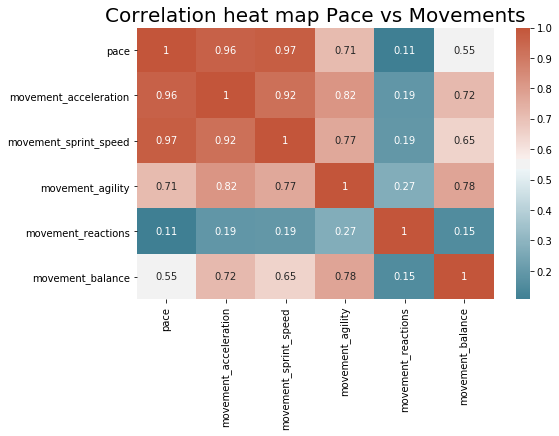

In [13]:
# #Pace (PAC) is a Player Attribute in FIFA that determines a player's speed in walking and running.
#Find correlation of peace with the movement skills. we can verify that the above is true.abs
movements = fifa20.columns.str.startswith("pace") | fifa20.columns.str.startswith("movement")
corr = fifa20.loc[:, movements].corr()
#plot
plt.figure(figsize=(8,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title(label="Correlation heat map Pace vs Movements", size=20)
plt.show()

In [14]:
#There are general skill used in fifa, lets find wich attributes defined each one
corr = fifa20.loc[:,"pace":].corr()

#Now print correlation with each attr just assuming corr>0.8.
start = fifa20.columns.get_loc("pace")
end = fifa20.columns.get_loc("physic")

for x in fifa20.columns[start:end+1]:
    skill_corr = corr[x][corr[x] > 0.8].sort_values(ascending=False)
    print(skill_corr.index[0])
    print('----------------------------------------')
    print(skill_corr[1:])
    print('')

pace
----------------------------------------
movement_sprint_speed    0.974205
movement_acceleration    0.962433
Name: pace, dtype: float64

shooting
----------------------------------------
attacking_finishing      0.963129
power_long_shots         0.920414
attacking_volleys        0.877211
power_shot_power         0.855266
mentality_positioning    0.854060
Name: shooting, dtype: float64

passing
----------------------------------------
attacking_short_passing    0.909663
mentality_vision           0.879250
skill_ball_control         0.855148
skill_long_passing         0.848942
attacking_crossing         0.835301
dribbling                  0.829985
skill_curve                0.801195
Name: passing, dtype: float64

dribbling
----------------------------------------
skill_dribbling          0.979469
skill_ball_control       0.921098
passing                  0.829985
mentality_positioning    0.803682
mentality_vision         0.803477
Name: dribbling, dtype: float64

defending
----------

In [15]:
#Drop general stats
fifa20_df = fifa20.drop(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'], axis=1)

In [16]:
fifa20_df.isna().sum()

name                          0
full_name                     0
age                           0
birthday                      0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_ju

# Wich country has the best overall

In [17]:
fifa20_df.head()

,name,full_name,age,birthday,height_cm,weight_kg,nationality,club,overall,potential,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,...,88,91,34,27,22,11,12,6,8,8


In [18]:
# Import libraries
import numpy as np 
import pandas as pd


#First, we are going to see the overall mean arraund the world
overall = fifa20_df.groupby("nationality")["overall"].mean()

# Create the Choropleth
pm.heatworld(overall.index, overall)

In [37]:
#It could be seen countries like Mozambique and Chad having the mayor overall, and potencies and football powers like Spain and Italy a step down. This may be becouse there are to many players in this countries, and the rank is bigger.

#To solve this, we are going to select only the first 100 players for each country, and discard those wich dont get to 50.

#drop countries with less than 100 players
morethan = fifa20_df.nationality.value_counts()
morethan = morethan[morethan > 100]

#order By overall and nationality
top_overall = fifa20_df.sort_values(["nationality", "overall"], ascending=[True, False])

#group and get first 100. group again and get mean. Take only more than 100
countries = top_overall.groupby(
    'nationality').head(100).groupby(
    'nationality')['overall'].mean()[morethan.index].sort_values(
     ascending=False)

countries

Spain                  81.97
Brazil                 81.03
France                 80.74
Germany                79.82
Argentina              79.26
Italy                  78.60
England                78.26
Portugal               77.59
Netherlands            76.52
Uruguay                75.77
Belgium                75.75
Colombia               74.71
Mexico                 73.19
Turkey                 73.02
Serbia                 72.40
Austria                72.12
Croatia                72.11
Denmark                72.10
Chile                  71.98
Switzerland            71.89
Sweden                 71.83
United States          71.18
Poland                 71.13
Scotland               70.97
Senegal                70.89
Japan                  70.87
Czech Republic         70.56
Norway                 70.40
Ivory Coast            69.71
Romania                69.54
Korea Republic         69.47
Nigeria                69.28
Ghana                  69.27
Republic of Ireland    68.54
Australia     

In [20]:
pm.heatworld(countries.index, countries)

In [39]:
data = [go.Bar(x=countries.index,
            y=countries)]
iplot(data, filename='better countries')